In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [ ]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d505f23e7b96bc2e3d68fe1051331f1


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | gat
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | saint anthony
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | meulaboh
Processing Record 9 of Set 1 | moranbah
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | eureka
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | kolokani
Processing Record 17 of Set 1 | nokia
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | kaputa
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | sambalpur
Processing Record 23 of Set 1 | humaita
Processing Record 24 of Set 1 

KeyboardInterrupt: 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gat,31.6100,34.7642,67.82,100,0,7.78,IL,2021-11-23 15:27:00
1,New Norfolk,-42.7826,147.0587,59.90,69,100,2.17,AU,2021-11-23 15:27:56
2,Ushuaia,-54.8000,-68.3000,42.46,65,75,19.57,AR,2021-11-23 15:27:56
3,Saint Anthony,45.0205,-93.2180,35.44,64,1,3.00,US,2021-11-23 15:24:28
4,Pevek,69.7008,170.3133,-18.56,98,79,2.93,RU,2021-11-23 15:27:56
5,Padang,-0.9492,100.3543,77.05,80,100,4.50,ID,2021-11-23 15:27:57
6,Te Anau,-45.4167,167.7167,43.21,96,26,1.14,NZ,2021-11-23 15:27:57
7,Meulaboh,4.1363,96.1285,76.06,89,100,7.96,ID,2021-11-23 15:27:58
8,Moranbah,-22.0016,148.0466,73.72,79,100,12.75,AU,2021-11-23 15:27:58
9,Hithadhoo,-0.6000,73.0833,82.26,75,100,18.25,MV,2021-11-23 15:27:59


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gat,IL,2021-11-23 15:27:00,31.6100,34.7642,67.82,100,0,7.78
1,New Norfolk,AU,2021-11-23 15:27:56,-42.7826,147.0587,59.90,69,100,2.17
2,Ushuaia,AR,2021-11-23 15:27:56,-54.8000,-68.3000,42.46,65,75,19.57
3,Saint Anthony,US,2021-11-23 15:24:28,45.0205,-93.2180,35.44,64,1,3.00
4,Pevek,RU,2021-11-23 15:27:56,69.7008,170.3133,-18.56,98,79,2.93
5,Padang,ID,2021-11-23 15:27:57,-0.9492,100.3543,77.05,80,100,4.50
6,Te Anau,NZ,2021-11-23 15:27:57,-45.4167,167.7167,43.21,96,26,1.14
7,Meulaboh,ID,2021-11-23 15:27:58,4.1363,96.1285,76.06,89,100,7.96
8,Moranbah,AU,2021-11-23 15:27:58,-22.0016,148.0466,73.72,79,100,12.75
9,Hithadhoo,MV,2021-11-23 15:27:59,-0.6000,73.0833,82.26,75,100,18.25


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

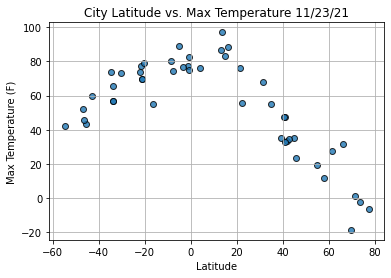

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

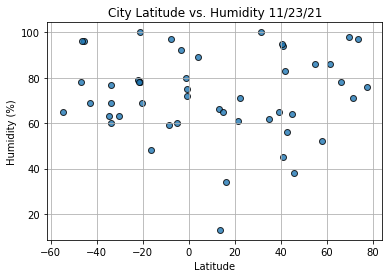

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

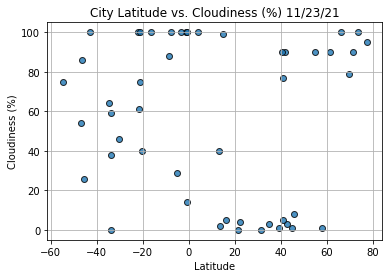

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

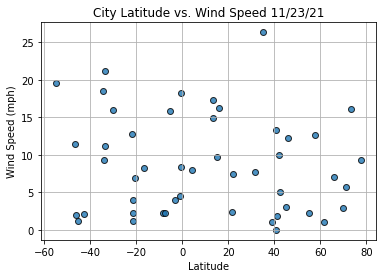

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()